In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
!ls

Olympic_Data_Analysis.ipynb  Olympics.zip  athlete_events.csv  noc_regions.csv


In [4]:
athlete = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [17]:
athlete.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [20]:
athlete.shape, region.shape

((271116, 15), (230, 3))

In [21]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [9]:
region['NOC'].unique().shape, athlete["NOC"].unique().shape

((230,), (230,))

joining these two datasets

In [36]:
df = athlete.merge(region, how='right', on='NOC').sort_values('ID').set_index('ID')

In [40]:
df.tail()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
ID,,,,,,,,,,,,,,,,
135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
135570.0,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014.0,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
135571.0,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002.0,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
135571.0,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998.0,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,SIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Singapore,NaN


In [38]:
df.shape

(270768, 16)

In [39]:
df.isnull().sum()

Name           1
Sex            1
Age         9463
Height     60084
Weight     62786
Team           1
NOC            0
Games          1
Year           1
Season         1
City           1
Sport          1
Event          1
Medal     230994
region        21
notes     265729
dtype: int64

In [44]:
df.duplicated().sum()

1385

In [51]:
# Changing column names
df.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)

In [77]:
df_india = df[df['Team']=='India'].reset_index()
df_india.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,281.0,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928.0,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
1,281.0,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928.0,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
2,512.0,Shiny Kurisingal Abraham-Wilson,F,27.0,167.0,53.0,India,IND,1992 Summer,1992.0,Summer,Barcelona,Athletics,Athletics Women's 800 metres,NaN,India,NaN
3,512.0,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988.0,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN
4,512.0,Shiny Kurisingal Abraham-Wilson,F,31.0,167.0,53.0,India,IND,1996 Summer,1996.0,Summer,Atlanta,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN


In [78]:
print("Total participation from India: ", df_india.shape[0])

Total participation from India:  1400


In [79]:
print("Total Number of participants from India: ", len(df_india['ID'].unique()) )

Total Number of participants from India:  891


In [80]:
print("Total Medals won by India: ", df_india['Medal'].notna().sum())


Total Medals won by India:  197


In [81]:
print("Medals won by India:\n", df_india['Medal'].value_counts())

Medals won by India:
 Gold      138
Bronze     40
Silver     19
Name: Medal, dtype: int64


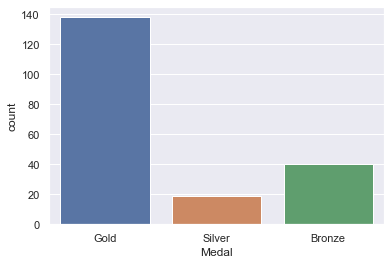

In [82]:
sns.set_theme()
sns.countplot(df_india['Medal'])
plt.show()

In [76]:
df_india[df_india['Medal']=='Gold']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
24,2699.0,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928.0,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
26,2703.0,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964.0,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN
28,2864.0,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN
29,2864.0,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932.0,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN
30,2864.0,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928.0,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,117232.0,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980.0,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN
1318,118553.0,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932.0,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN
1319,118553.0,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936.0,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN
1371,125560.0,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948.0,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN


In [89]:
# Top 10 countrie with highest participation
print("Top 10 countrie with highest participation")
df['Team'].value_counts().sort_values(ascending=False).head(10)

Top 10 countrie with highest participation


United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

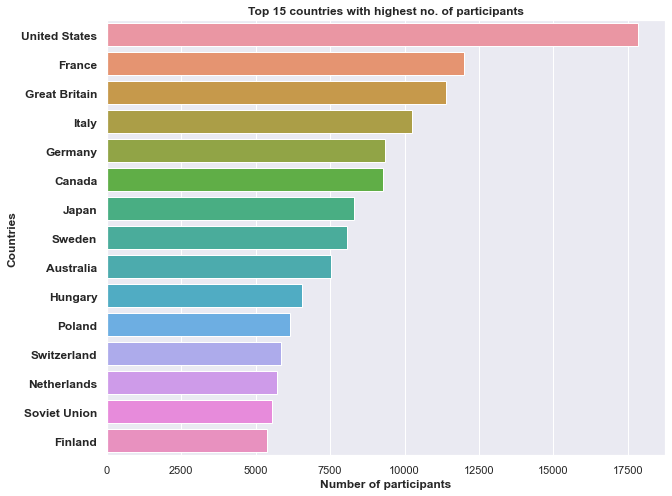

In [109]:
plt.figure(figsize=(10,8))
sns.barplot(y=df['Team'].value_counts().head(15).index, x=df['Team'].value_counts().head(15), orient='h')
plt.yticks(fontweight='bold', fontsize=12)
plt.xlabel("Number of participants", fontweight='bold', fontsize=12)
plt.ylabel("Countries", fontweight='bold', fontsize=12)
plt.title("Top 15 countries with highest no. of participants", fontweight='bold', fontsize=12)
plt.show()

### Age Distribution

In [114]:
df['Age'].max(), df['Age'].min()

(97.0, 10.0)

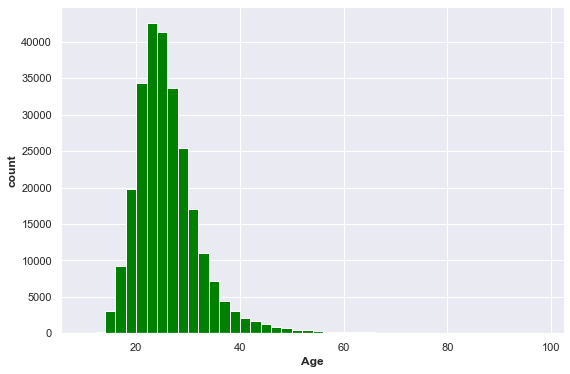

In [120]:
plt.figure(figsize=(9,6))
plt.hist(df['Age'], bins=np.arange(10,100,2), color='green')
plt.xlabel("Age", fontweight='bold')
plt.ylabel("count", fontweight='bold')
plt.show()

### Seasons

In [121]:
 df['Season'].value_counts()

Summer    222203
Winter     48564
Name: Season, dtype: int64

In [122]:
summer_df = df[df['Season']=='Summer']
winter_df = df[df['Season']=='Winter']

In [127]:
# Summer olympic sports
print("Total number of sports played in summer olympics: ", len(summer_df['Sport'].unique()))
print("\nSummer olympic sports are:\n",summer_df['Sport'].unique())

Total number of sports played in summer olympics:  52

Summer olympic sports are:
 ['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics']


In [128]:
# Winter olympic sports
print("Total number of sports played in winter olympics: ", len(winter_df['Sport'].unique()))
print("\nWinter olympic sports are:\n",winter_df['Sport'].unique())

Total number of sports played in winter olympics:  17

Winter olympic sports are:
 ['Speed Skating' 'Cross Country Skiing' 'Ice Hockey' 'Biathlon'
 'Alpine Skiing' 'Luge' 'Bobsleigh' 'Figure Skating' 'Nordic Combined'
 'Freestyle Skiing' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Short Track Speed Skating' 'Skeleton' 'Military Ski Patrol' 'Alpinism']


## Male-Female ratios in Olympics

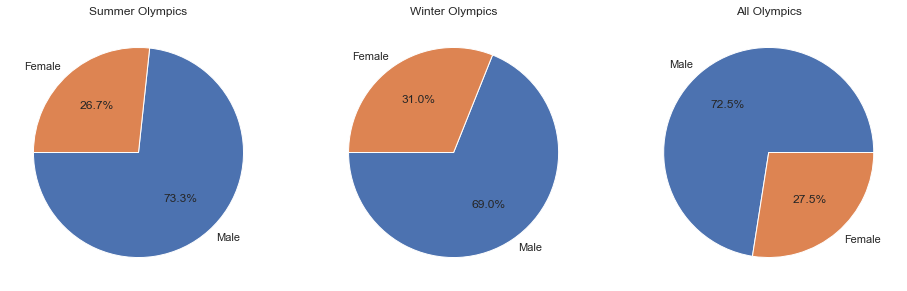

In [140]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.pie(summer_df['Sex'].value_counts(), autopct='%1.1f%%', labels=['Male', 'Female'], startangle=180)
plt.title("Summer Olympics")
plt.subplot(1,3,2)
plt.pie(winter_df['Sex'].value_counts(), autopct='%1.1f%%', labels=['Male', 'Female'], startangle=180)
plt.title("Winter Olympics")
plt.subplot(1,3,3)
plt.pie(df['Sex'].value_counts(), autopct='%1.1f%%', labels=['Male', 'Female'])
plt.title("All Olympics")

plt.show()

In [145]:
print("Male femalle numbers in summer olympics:\n", summer_df['Sex'].value_counts())

Male femalle numbers in summer olympics:
 M    162889
F     59314
Name: Sex, dtype: int64


In [146]:
print("Male femalle numbers in winter olympics:\n", winter_df['Sex'].value_counts())

Male femalle numbers in winter olympics:
 M    33485
F    15079
Name: Sex, dtype: int64


## Female participants in each olympic

In [239]:
# Summer olympics
df[(df['Sex']=='F') & (df['Season']=='Summer')].groupby('Year')['Team'].count()

Year
1900.0      33
1904.0      16
1906.0      11
1908.0      47
1912.0      87
1920.0     134
1924.0     244
1928.0     404
1932.0     347
1936.0     468
1948.0     628
1952.0    1495
1956.0     890
1960.0    1435
1964.0    1348
1968.0    1777
1972.0    2190
1976.0    2171
1980.0    1756
1984.0    2447
1988.0    3542
1992.0    4110
1996.0    4998
2000.0    5418
2004.0    5531
2008.0    5793
2012.0    5791
2016.0    6203
Name: Team, dtype: int64

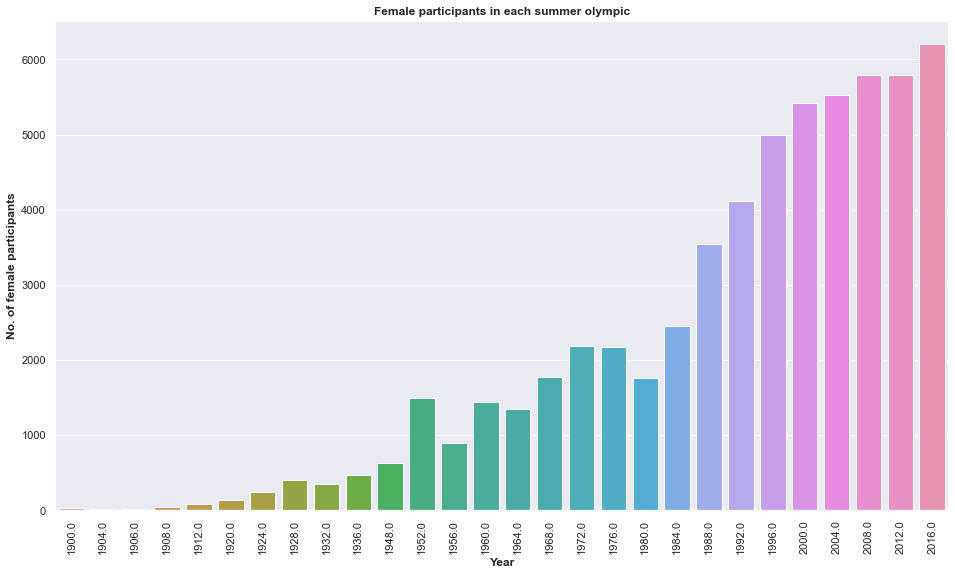

In [243]:
plt.figure(figsize=(16,9))
sns.barplot(x=df[(df['Sex']=='F') & (df['Season']=='Summer')].groupby('Year')['Team'].count().index,
           y=df[(df['Sex']=='F') & (df['Season']=='Summer')].groupby('Year')['Team'].count().values)

plt.title("Female participants in each summer olympic", fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.ylabel("No. of female participants", fontweight='bold')

plt.xticks(rotation=90)
plt.show()

In [244]:
# Summer olympics
df[(df['Sex']=='F') & (df['Season']=='Winter')].groupby('Year')['Team'].count()

Year
1924.0      17
1928.0      33
1932.0      22
1936.0      81
1948.0     133
1952.0     185
1956.0     246
1960.0     295
1964.0     404
1968.0     416
1972.0     415
1976.0     434
1980.0     430
1984.0     536
1988.0     680
1992.0    1054
1994.0    1105
1998.0    1384
2002.0    1582
2006.0    1757
2010.0    1847
2014.0    2023
Name: Team, dtype: int64

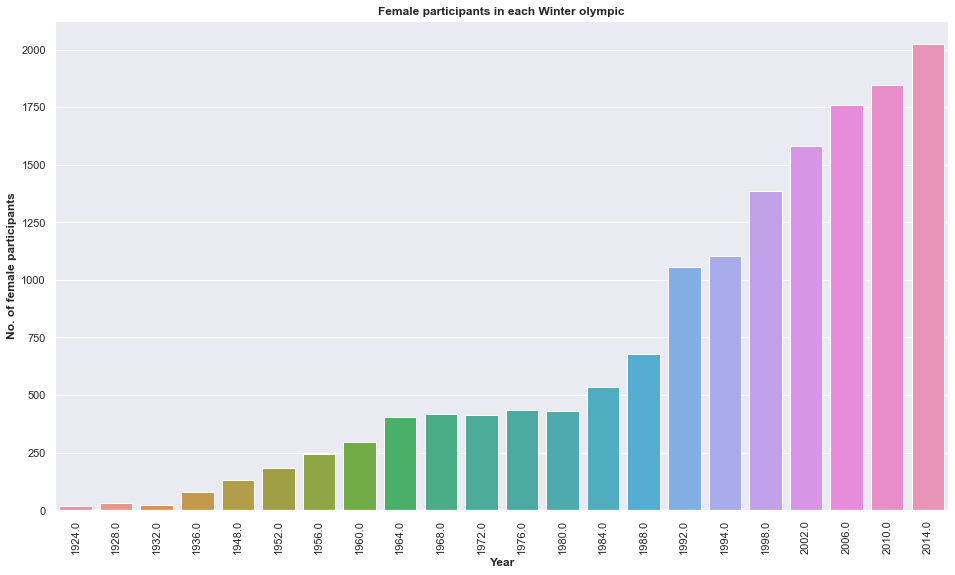

In [245]:
plt.figure(figsize=(16,9))
sns.barplot(x=df[(df['Sex']=='F') & (df['Season']=='Winter')].groupby('Year')['Team'].count().index,
           y=df[(df['Sex']=='F') & (df['Season']=='Winter')].groupby('Year')['Team'].count().values)

plt.title("Female participants in each Winter olympic", fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.ylabel("No. of female participants", fontweight='bold')

plt.xticks(rotation=90)
plt.show()

## Gold Medal Statistics

In [143]:
print("Total number of medals won: ", df['Medal'].notna().sum())

Total number of medals won:  39774


In [149]:
print("Athletes won Gold medal")
gold_df = df[df['Medal']=='Gold']
gold_df

Athletes won Gold medal


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
ID,,,,,,,,,,,,,,,,
4.0,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
17.0,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
17.0,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
17.0,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948.0,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
20.0,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002.0,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135503.0,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004.0,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
135520.0,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004.0,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
135523.0,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996.0,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN


## Gold Medals won beyond age 60

In [166]:
# Gold Medals won beyond age 60
print("Gold Medals won beyond age 60")
gold_age = gold_df[np.isfinite(gold_df['Age'])]
gold_60 = gold_age[gold_age['Age']>=60]
gold_60

Gold Medals won beyond age 60


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
ID,,,,,,,,,,,,,,,,
52626.0,Isaac Lazarus Israls,M,63.0,NaN,NaN,Netherlands,NED,1928 Summer,1928.0,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",Gold,Netherlands,NaN
53238.0,Charles Jacobus,M,64.0,NaN,NaN,United States,USA,1904 Summer,1904.0,Summer,St. Louis,Roque,Roque Men's Singles,Gold,USA,NaN
79961.0,Joshua Kearney Millner,M,60.0,NaN,NaN,Great Britain,GBR,1908 Summer,1908.0,Summer,London,Shooting,"Shooting Men's Free Rifle, 1,000 Yards",Gold,UK,NaN
95906.0,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904.0,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
113773.0,"Galen Carter ""G. C."" Spencer",M,63.0,165.0,NaN,Potomac Archers,USA,1904 Summer,1904.0,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA,NaN
117046.0,Oscar Gomer Swahn,M,60.0,NaN,NaN,Sweden,SWE,1908 Summer,1908.0,Summer,London,Shooting,"Shooting Men's Running Target, Single Shot",Gold,Sweden,NaN
117046.0,Oscar Gomer Swahn,M,60.0,NaN,NaN,Sweden,SWE,1908 Summer,1908.0,Summer,London,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,Sweden,NaN
117046.0,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912 Summer,1912.0,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,Sweden,NaN
130662.0,"Robert W. Williams, Jr.",M,63.0,NaN,NaN,Potomac Archers,USA,1904 Summer,1904.0,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA,NaN


In [167]:
print("Number of Gold Medals won beyond age 60: ", gold_60.shape[0])

Number of Gold Medals won beyond age 60:  10


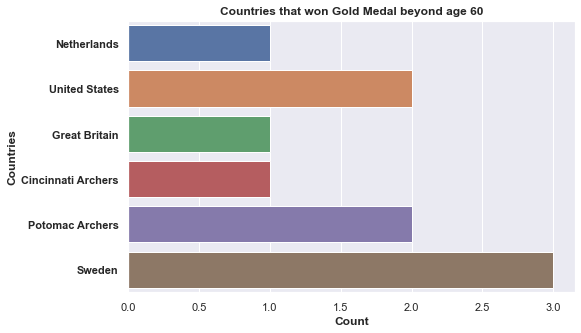

In [168]:
plt.figure(figsize=(8,5))
plt.title("Countries that won Gold Medal beyond age 60", fontweight='bold')
sns.countplot(y=gold_60['Team'])
plt.xlabel("Count", fontweight='bold')
plt.ylabel("Countries", fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

In [174]:
gold_60[['Age', 'Sport']]

,Age,Sport
ID,,
52626.0,63.0,Art Competitions
53238.0,64.0,Roque
79961.0,60.0,Shooting
95906.0,63.0,Archery
113773.0,63.0,Archery
117046.0,60.0,Shooting
117046.0,60.0,Shooting
117046.0,64.0,Shooting
130662.0,63.0,Archery


In [180]:
print("Sporting events where gold medals are won by athletes of age beyond 60:\n\n", gold_60['Sport'].values)

Sporting events where gold medals are won by athletes of age beyond 60:

 ['Art Competitions' 'Roque' 'Shooting' 'Archery' 'Archery' 'Shooting'
 'Shooting' 'Shooting' 'Archery' 'Art Competitions']


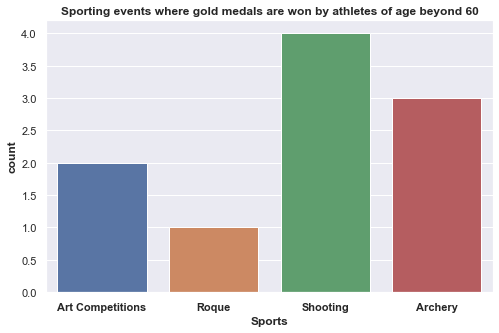

In [183]:
plt.figure(figsize=(8,5))
sns.countplot(gold_60['Sport'].values)
plt.xlabel("Sports", fontweight='bold')
plt.ylabel("count", fontweight='bold')
plt.xticks(fontweight='bold')
plt.title("Sporting events where gold medals are won by athletes of age beyond 60", fontweight='bold')
plt.show()

### Top 10 countries with most number of gold medals

In [189]:


print("Top 10 countries with most number of gold medals")
gold_top10 = gold_df['Team'].value_counts().head(10)
gold_top10

Top 10 countries with most number of gold medals


United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Hungary           432
Canada            422
East Germany      369
Name: Team, dtype: int64

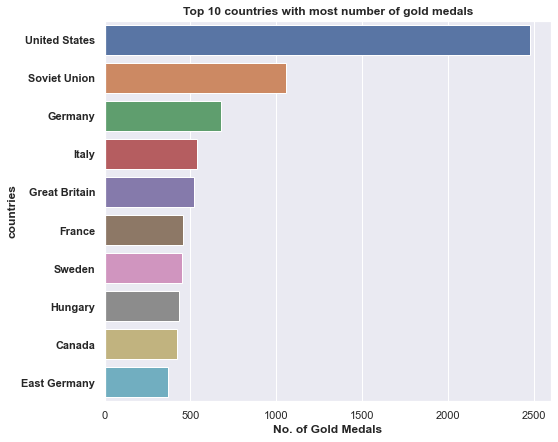

In [214]:
plt.figure(figsize=(8,7))
sns.barplot(y = gold_top10.index, x=gold_top10.values)
plt.xlabel("No. of Gold Medals", fontweight='bold')
plt.ylabel("countries", fontweight='bold')
plt.yticks(fontweight='bold')
plt.title("Top 10 countries with most number of gold medals", fontweight='bold')
plt.show()

## Rio Olympic

In [196]:
gold_2016 = df[(df['Year']==2016) & (df['Medal']=='Gold')]
gold_2016.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
ID,,,,,,,,,,,,,,,,
608.0,Ahmad Abughaush,M,20.0,178.0,68.0,Jordan,JOR,2016 Summer,2016.0,Summer,Rio de Janeiro,Taekwondo,Taekwondo Men's Featherweight,Gold,Jordan,NaN
832.0,Nicola Virginia Adams,F,33.0,164.0,51.0,Great Britain,GBR,2016 Summer,2016.0,Summer,Rio de Janeiro,Boxing,Boxing Women's Flyweight,Gold,UK,NaN
1017.0,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
1017.0,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold,USA,NaN
1374.0,Tontowi Ahmad,M,29.0,179.0,72.0,Indonesia-1,INA,2016 Summer,2016.0,Summer,Rio de Janeiro,Badminton,Badminton Mixed Doubles,Gold,Indonesia,NaN


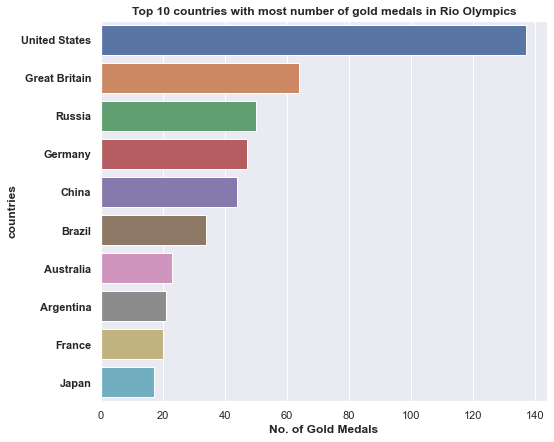

In [213]:
plt.figure(figsize=(8,7))
sns.barplot(y = gold_2016['Team'].value_counts().index[:10], x=gold_2016['Team'].value_counts().values[:10] )

plt.xlabel("No. of Gold Medals", fontweight='bold')
plt.ylabel("countries", fontweight='bold')
plt.yticks(fontweight='bold')
plt.title("Top 10 countries with most number of gold medals in Rio Olympics", fontweight='bold')
plt.show()

## Height vs Weight of Medalist

In [219]:
df[df['Medal'].notna()]['Weight']

ID
4.0          NaN
15.0         NaN
15.0         NaN
16.0        85.0
17.0        64.0
            ... 
135553.0    80.0
135553.0    80.0
135554.0    82.0
135563.0    64.0
135563.0    64.0
Name: Weight, Length: 39774, dtype: float64

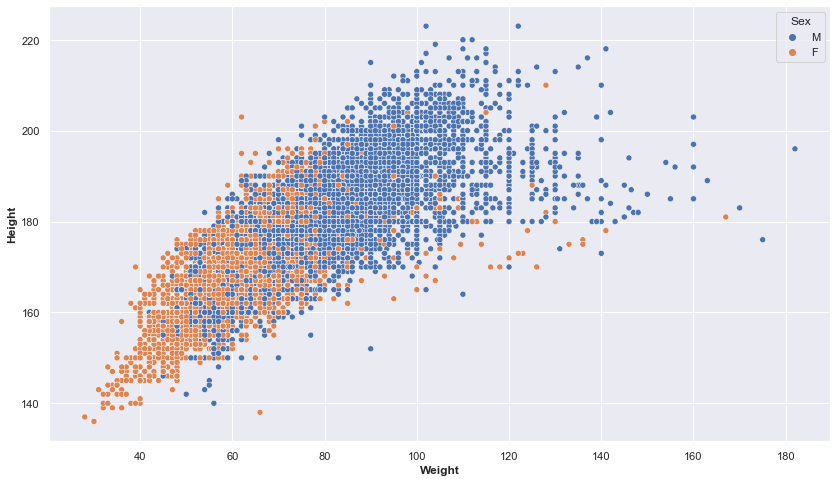

In [224]:
plt.figure(figsize=(14,8))
sns.scatterplot(data = df[df['Medal'].notna()], x= 'Weight', y='Height', hue='Sex')
plt.xlabel("Weight", fontweight='bold')
plt.ylabel("Height", fontweight='bold')
plt.show()